Analysis of Attrition in organization with predictor variables such as age, education, gender, distance from home, percentage of salary hike etc amongst others. 

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn as metrics

In [3]:
# the data is about Hr Analytics
data= pd.read_csv(r"C:\Users\Admin\Downloads\dataset\hr_analytics_data.csv")

In [4]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

Dropping the NAs, and calculting the percentage of rows dropped if it will be significant to affect our results of our analysis 

In [6]:
data.isna().sum().sum()

28

In [7]:
#  since the column "NumCompaniesWorked" and "TotalWorkingYears " has na, we shall drop all the na
before= len(data)#number of rows before dropping
print("rows before dropping na",before)
data= data.dropna()


rows before dropping na 4410


In [8]:
# percentage of data drop
after= len(data)
print("rows after dropping na", after)
percentage= ((before-after)/before)*100
print("percentage of rows dropped",percentage)

rows after dropping na 4382
percentage of rows dropped 0.6349206349206349


In [9]:
# % of attrition and non attrittion
attrition_non_attrition= data["Attrition"].value_counts(normalize=True)
print("percentage of attrition",attrition_non_attrition)


percentage of attrition No     0.839115
Yes    0.160885
Name: Attrition, dtype: float64


In [10]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning) 

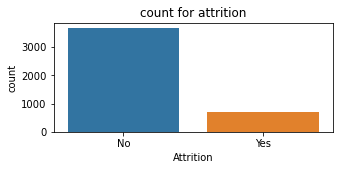

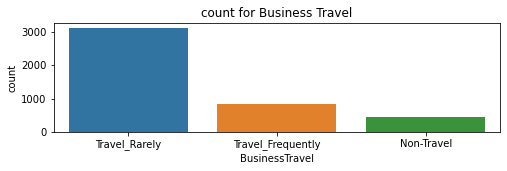

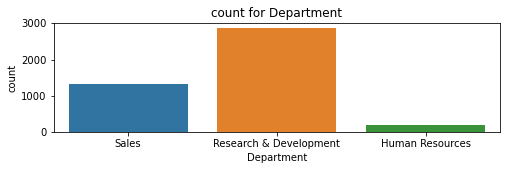

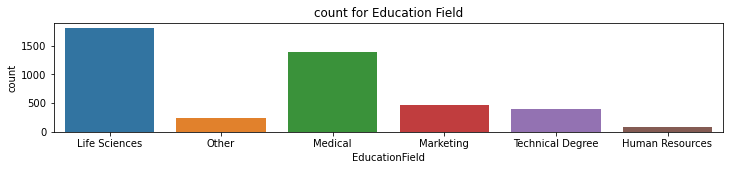

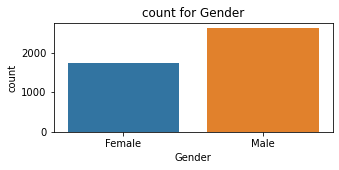

In [11]:
# plot of counts
plt.figure(figsize=(5, 2))
sns.countplot(data["Attrition"])
plt.title("count for attrition")
plt.show()

plt.figure(figsize=(8, 2))
sns.countplot(data["BusinessTravel"])
plt.title("count for Business Travel")
plt.show()

plt.figure(figsize=(8, 2))
sns.countplot(data["Department"])
plt.title("count for Department")
plt.show()

plt.figure(figsize=(12, 2))
sns.countplot(data["EducationField"])
plt.title("count for Education Field")
plt.show()

plt.figure(figsize=(5, 2))
sns.countplot(data["Gender"])
plt.title("count for Gender")
plt.show()

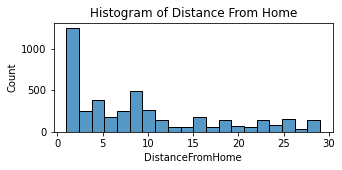

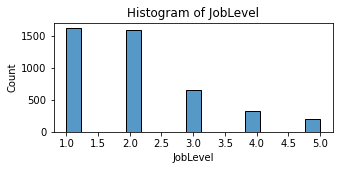

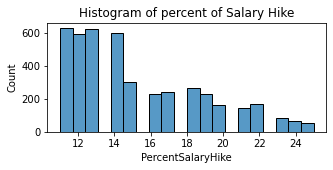

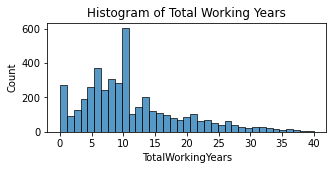

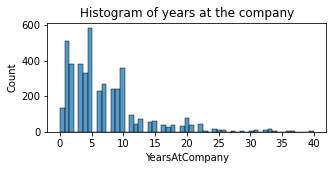

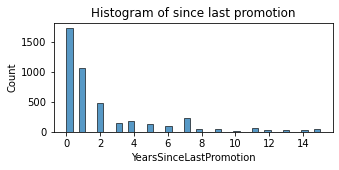

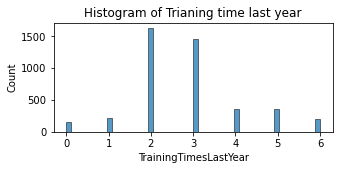

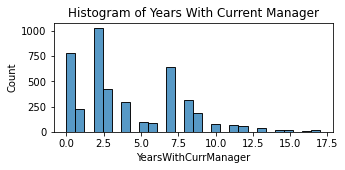

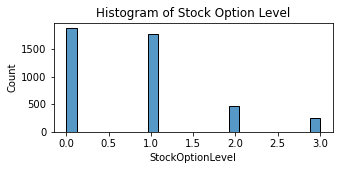

In [12]:
#histo gram plot
plt.figure(figsize=(5,2))
sns.histplot(data["DistanceFromHome"])
plt.title("Histogram of Distance From Home")
plt.show()

plt.figure(figsize=(5,2))
sns.histplot(data["JobLevel"])
plt.title("Histogram of JobLevel")
plt.show()

plt.figure(figsize=(5,2))
sns.histplot(data["PercentSalaryHike"])
plt.title("Histogram of percent of Salary Hike")
plt.show()

plt.figure(figsize=(5,2))
sns.histplot(data["TotalWorkingYears"])
plt.title("Histogram of Total Working Years")
plt.show()

plt.figure(figsize=(5,2))
sns.histplot(data["YearsAtCompany"])
plt.title("Histogram of years at the company")
plt.show()

plt.figure(figsize=(5,2))
sns.histplot(data["YearsSinceLastPromotion"])
plt.title("Histogram of since last promotion")
plt.show()

plt.figure(figsize=(5,2))
sns.histplot(data["TrainingTimesLastYear"])
plt.title("Histogram of Trianing time last year")
plt.show()

plt.figure(figsize=(5,2))
sns.histplot(data["YearsWithCurrManager"])
plt.title("Histogram of Years With Current Manager")
plt.show()

plt.figure(figsize=(5,2))
sns.histplot(data["StockOptionLevel"])
plt.title("Histogram of Stock Option Level")
plt.show()


map the the attrition column to 0 and 1 since it is our target variable

In [13]:

attrition_mapping = {"No": 0, "Yes": 1}
data["Attrition"]= data["Attrition"].map(attrition_mapping)
print(data["Over18"].unique())
print(data["EmployeeCount"].unique())
print(data["StandardHours"].nunique())

['Y']
[1]
1


<AxesSubplot:>

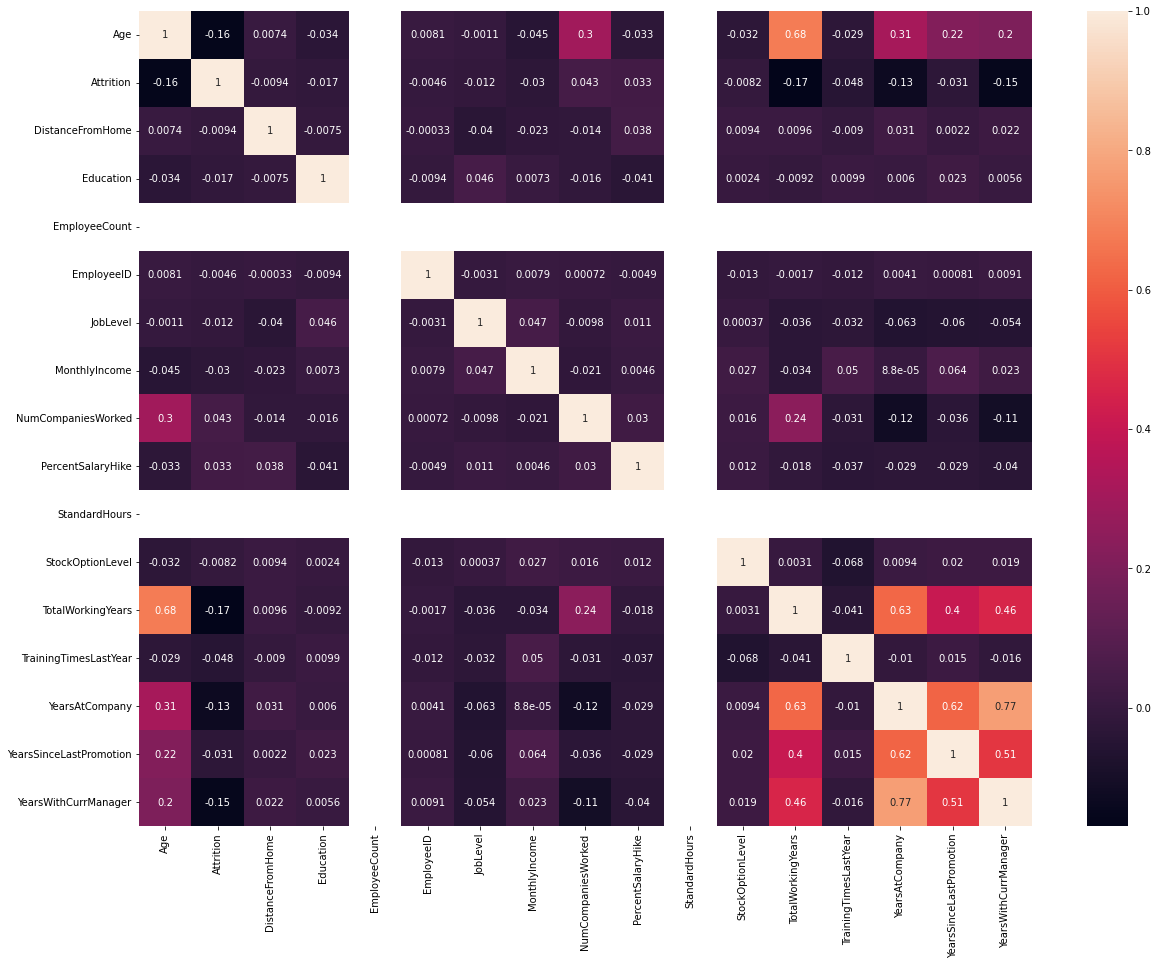

In [14]:
# visualizing the relationship between each of the variables
correlation= data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(correlation, annot=True)

we shall these variables from our analysis, EmployeeCount, Over18, StandardHours because from the correllation table that didn't add significantly to the table.

In [15]:
#droping columns
data= data.drop(["EmployeeCount", "Over18", "StandardHours", "StandardHours"], axis=1)

In [16]:
#getting dummies  for the variables
data= pd.get_dummies(data, columns=["BusinessTravel","Department","EducationField","Gender","JobRole","MaritalStatus","MaritalStatus"])
data.head()

,Age,Attrition,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,51,0,6,2,1,1,131160,1.0,11,0,...,0,0,0,0,0,1,0,0,1,0
1,31,1,10,1,2,1,41890,0.0,23,1,...,0,1,0,0,0,0,1,0,0,1
2,32,0,17,4,3,4,193280,1.0,15,3,...,0,0,1,0,0,1,0,0,1,0
3,38,0,2,5,4,3,83210,3.0,11,3,...,0,0,0,0,0,1,0,0,1,0
4,32,0,10,1,5,1,23420,4.0,12,2,...,0,0,1,0,0,0,1,0,0,1


In [17]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,4382.0,36.933364,9.137272,18.0,30.00,36.0,43.00,60.0
Attrition,4382.0,0.160885,0.367467,0.0,0.00,0.0,0.00,1.0
DistanceFromHome,4382.0,9.198996,8.105396,1.0,2.00,7.0,14.00,29.0
Education,4382.0,2.912369,1.024728,1.0,2.00,3.0,4.00,5.0
EmployeeID,4382.0,2207.804884,1271.688783,1.0,1108.25,2208.5,3308.75,4409.0
JobLevel,4382.0,2.063898,1.106115,1.0,1.00,2.0,3.00,5.0
MonthlyIncome,4382.0,65061.702419,47142.310175,10090.0,29110.00,49190.0,83790.00,199990.0
NumCompaniesWorked,4382.0,2.693291,2.497832,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,4382.0,15.210634,3.663007,11.0,12.00,14.0,18.00,25.0
StockOptionLevel,4382.0,0.794614,0.852397,0.0,0.00,1.0,1.00,3.0


Rescaling: NO- since we are using decision Trees, rescaling will not be needed

In [18]:
# model building
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

Intanstiating x and y , than using at test size of 30%

In [19]:
x= data.drop(["Attrition"],axis=1)
y=data["Attrition"]

x_trian,x_test,y_train,y_test= train_test_split(x,y,test_size=0.30, random_state=42)

In [20]:
clf=DecisionTreeClassifier()
model=clf.fit(x_trian,y_train,)
y_pred=model.predict(x_test)


In [21]:
# model metrics
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("precision score",precision)
print("f1 score",f1)
print("recall score",recall)
print("accuracy score",accuracy)


precision score 0.87
f1 score 0.8969072164948454
recall score 0.925531914893617
accuracy score 0.9695817490494296


The precision 87.87% suggests that the model correctly identifies the positive class with few false positives. The F1 score balances precision and recall, showing good trade-off between false positives and false negatives. The high recall of 92.55% demonstrates the model's ability to capture most of the positive instances. The high accuracy implies that the model correctly classifies a large portion of the dataset. But we still need to tune the model.

<AxesSubplot:>

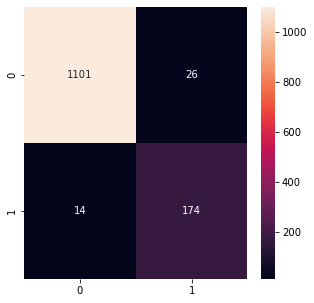

In [22]:
#confussion matrix
from sklearn.metrics import confusion_matrix
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True,fmt='d')

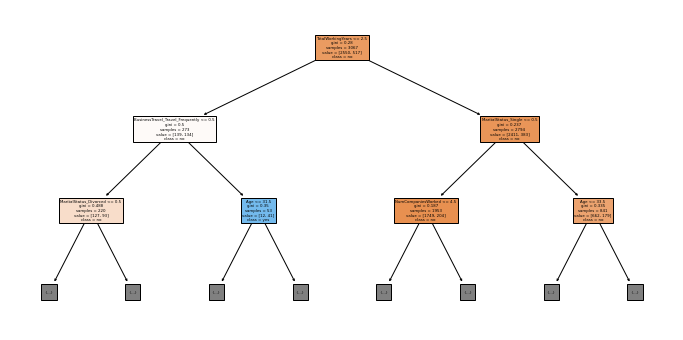

In [23]:
plt.figure(figsize=(12, 6))
plot_tree(model,filled=True, feature_names=x.columns, class_names=["no", "yes"], max_depth=2)
plt.show()

Tunning of the model

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 100],
    'min_samples_split': [2, 5, 100]}

In [26]:
classifer=DecisionTreeClassifier()
tuned_model= GridSearchCV( classifer,parameters,  cv=5)
tuned_model=tuned_model.fit(x_trian, y_train)
print(tuned_model.best_params_)

{'criterion': 'gini', 'max_depth': 100, 'min_samples_split': 2}


In [27]:
best_model = tuned_model.best_estimator_
best_tune_model=best_model.fit(x_trian,y_train)
y_prediction=best_tune_model.predict(x_test)


accuracy_tune = accuracy_score(y_test, y_prediction)
precision_tune = precision_score(y_test, y_prediction)
recall_tune = recall_score(y_test, y_prediction)
f1_tune = f1_score(y_test, y_prediction)

# Print or visualize the evaluation metrics

print("precision_tuned_score:", precision_tune)
print("recall_tuned_score:", recall_tune)
print("f1_tuned_score:", f1_tune)
print("accuracy_tuned_score:", accuracy_tune)

precision_tuned_score: 0.8634146341463415
recall_tuned_score: 0.9414893617021277
f1_tuned_score: 0.900763358778626
accuracy_tuned_score: 0.9703422053231939


since the accuracy of the tuned model is abit higher than the initial model, we deploy the tuned mode.

Model explainabilty

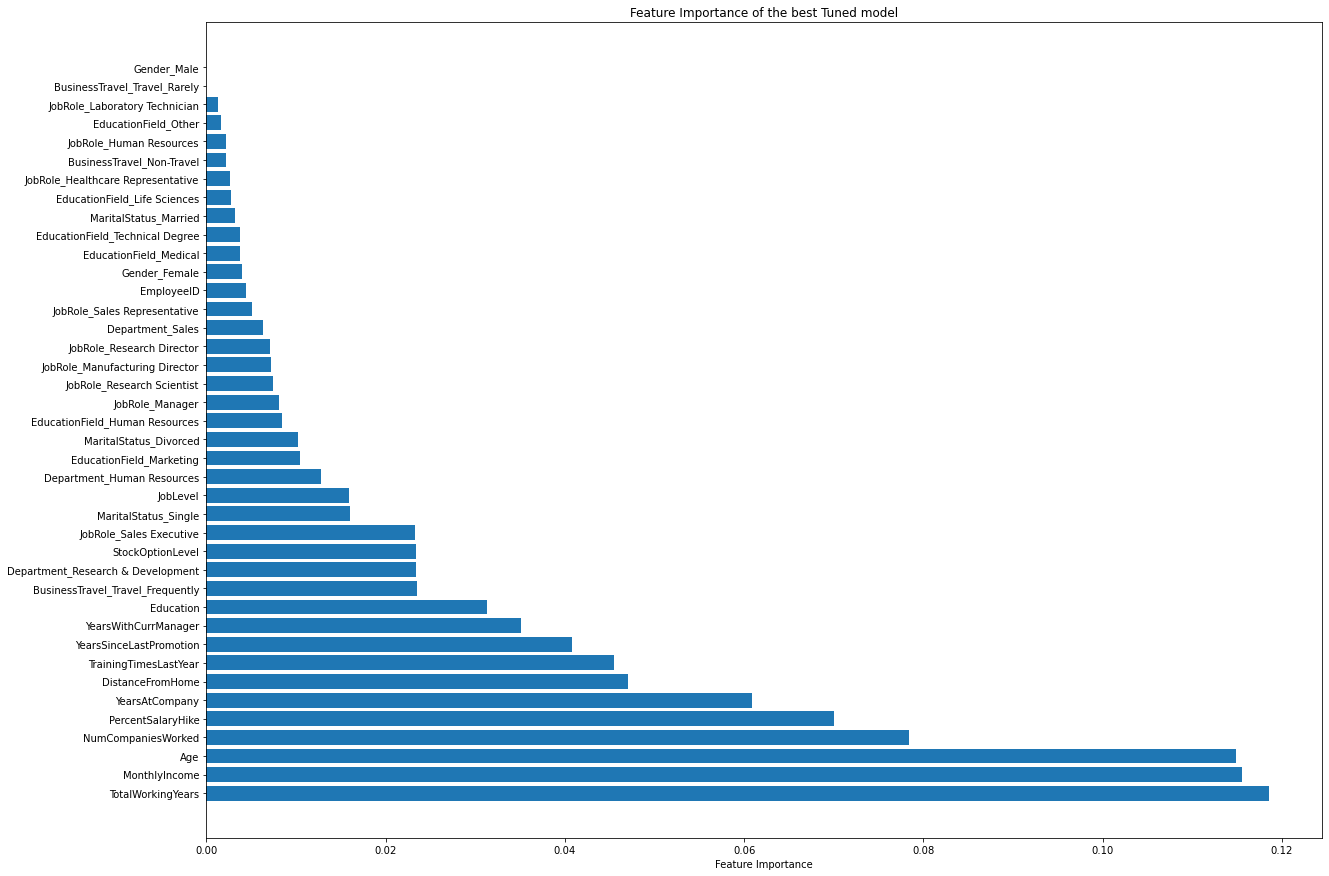

In [28]:
features= best_tune_model.feature_importances_


sorted_importance = sorted(zip(x_trian.columns, features), key=lambda x: x[1], reverse=True)


plt.figure(figsize=(20, 15))
plt.barh([x[0] for x in sorted_importance], [x[1] for x in sorted_importance])
plt.xlabel('Feature Importance')
plt.title('Feature Importance of the best Tuned model')
plt.show()

Conclusions:

The most important features for predicting attrition are MonthlyIncome,TotalWorkingHours, Age, NumCompaniesWorked and 
PercentSalaryHike. 
The initial model trained has a precision of 87.87%, recall  of  92.55%, f1 score of 90.16%, and accuracy of  97.11% While the 
tuned model has a precision of 89%, recall  of  94.68%,f1 score of 91.75% and accuracy of  97.57% thus we deploy
the tuned model because of it superior accuracy score.

Further analysis needs to be done to understand the ages patterns, monthly income range,total working hours,
numbers of companies worked for and salary hike as they contribute to attrition. This will enable right targeted retention strategies to reduce attrition.